In [4]:
import os
os.listdir()

['Corporate_Energy_Consumption.csv',
 'corp_energy.ipynb',
 'data_exploration.ipynb',
 'debug.log',
 'final_map.html',
 'masks',
 'SolarPotential2018_TWP22_RGE01_M5.prj',
 'SolarPotential2018_TWP22_RGE01_M5.tfw',
 'SolarPotential2018_TWP22_RGE01_M5.tif',
 'SolarPotential2018_TWP22_RGE02_M5.prj',
 'SolarPotential2018_TWP22_RGE02_M5.tfw',
 'SolarPotential2018_TWP22_RGE02_M5.tif',
 'SolarPotential2018_TWP22_RGE28_M4.prj',
 'SolarPotential2018_TWP22_RGE28_M4.tfw',
 'SolarPotential2018_TWP22_RGE28_M4.tif',
 'SolarPotential2018_TWP22_RGE29_M4.prj',
 'SolarPotential2018_TWP22_RGE29_M4.tfw',
 'SolarPotential2018_TWP22_RGE29_M4.tif',
 'SolarPotential2018_TWP23_RGE01_M5.prj',
 'SolarPotential2018_TWP23_RGE01_M5.tfw',
 'SolarPotential2018_TWP23_RGE01_M5.tif',
 'SolarPotential2018_TWP23_RGE02_M5.prj',
 'SolarPotential2018_TWP23_RGE02_M5.tfw',
 'SolarPotential2018_TWP23_RGE02_M5.tif',
 'SolarPotential2018_TWP23_RGE28_M4.prj',
 'SolarPotential2018_TWP23_RGE28_M4.tfw',
 'SolarPotential2018_TWP23_RGE2

In [1]:
import os
tif_list=[]
prj_list = []
dir_loc = "./"
for f in os.listdir(dir_loc): 
  print(f)
  if len(f.split(".")) == 1: 
    continue
  if f.split(".")[1] == "tif" or f.split(".")[1] == "tiff":
      tif_list.append(f)
  if f.split(".")[1] == "prj":
      prj_list.append(f)
print(tif_list)
print(len(tif_list))


Corporate_Energy_Consumption.csv
corp_energy.ipynb
data_exploration.ipynb
debug.log
final_map.html
final_map2.html
masks
SolarPotential2018_TWP22_RGE01_M5.prj
SolarPotential2018_TWP22_RGE01_M5.tfw
SolarPotential2018_TWP22_RGE01_M5.tif
SolarPotential2018_TWP22_RGE02_M5.prj
SolarPotential2018_TWP22_RGE02_M5.tfw
SolarPotential2018_TWP22_RGE02_M5.tif
SolarPotential2018_TWP22_RGE28_M4.prj
SolarPotential2018_TWP22_RGE28_M4.tfw
SolarPotential2018_TWP22_RGE28_M4.tif
SolarPotential2018_TWP22_RGE29_M4.prj
SolarPotential2018_TWP22_RGE29_M4.tfw
SolarPotential2018_TWP22_RGE29_M4.tif
SolarPotential2018_TWP23_RGE01_M5.prj
SolarPotential2018_TWP23_RGE01_M5.tfw
SolarPotential2018_TWP23_RGE01_M5.tif
SolarPotential2018_TWP23_RGE02_M5.prj
SolarPotential2018_TWP23_RGE02_M5.tfw
SolarPotential2018_TWP23_RGE02_M5.tif
SolarPotential2018_TWP23_RGE28_M4.prj
SolarPotential2018_TWP23_RGE28_M4.tfw
SolarPotential2018_TWP23_RGE28_M4.tif
SolarPotential2018_TWP23_RGE29_M4.prj
SolarPotential2018_TWP23_RGE29_M4.tfw
Solar

In [6]:
%%bash 
mkdir masks

mkdir: cannot create directory ‘masks’: File exists


CalledProcessError: Command 'b'mkdir masks\n'' returned non-zero exit status 1.

In [1]:
os.listdir()

['Corporate_Energy_Consumption.csv',
 'corp_energy.ipynb',
 'data_exploration.ipynb',
 'debug.log',
 'final_map.html',
 'masks',
 'SolarPotential2018_TWP22_RGE01_M5.prj',
 'SolarPotential2018_TWP22_RGE01_M5.tfw',
 'SolarPotential2018_TWP22_RGE01_M5.tif',
 'SolarPotential2018_TWP22_RGE02_M5.prj',
 'SolarPotential2018_TWP22_RGE02_M5.tfw',
 'SolarPotential2018_TWP22_RGE02_M5.tif',
 'SolarPotential2018_TWP22_RGE28_M4.prj',
 'SolarPotential2018_TWP22_RGE28_M4.tfw',
 'SolarPotential2018_TWP22_RGE28_M4.tif',
 'SolarPotential2018_TWP22_RGE29_M4.prj',
 'SolarPotential2018_TWP22_RGE29_M4.tfw',
 'SolarPotential2018_TWP22_RGE29_M4.tif',
 'SolarPotential2018_TWP23_RGE01_M5.prj',
 'SolarPotential2018_TWP23_RGE01_M5.tfw',
 'SolarPotential2018_TWP23_RGE01_M5.tif',
 'SolarPotential2018_TWP23_RGE02_M5.prj',
 'SolarPotential2018_TWP23_RGE02_M5.tfw',
 'SolarPotential2018_TWP23_RGE02_M5.tif',
 'SolarPotential2018_TWP23_RGE28_M4.prj',
 'SolarPotential2018_TWP23_RGE28_M4.tfw',
 'SolarPotential2018_TWP23_RGE2

In [2]:
import rasterio
import os
import numpy as np
from affine import Affine
from pyproj import Proj, transform
from rasterio.warp import calculate_default_transform, reproject, Resampling

def generate_projected_rasters(file_list):
    in_dir = "./"
    out_dir = "./masks/"
    dst_crs = 'EPSG:4326' 
    scale_factor = 2.5
    file_counter = 0 
    for f in file_list: 
      file_counter +=1
      fname = in_dir + f
      fout = out_dir + f.split(".")[0] + "_proj.tiff"
  
      with rasterio.open(fname) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width // scale_factor, src.height//scale_factor, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        # Use rasterio package as rio to write out the new projected raster
        # Code uses loop to account for multi-band rasters
        with rasterio.open(fout, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest) 
      # if (file_counter ==1): 
      #   return


generate_projected_rasters(tif_list)


In [2]:
pip install branca

Note: you may need to restart the kernel to use updated packages.


In [8]:
import folium
import rasterio
import os
import branca 
out_dir = "./masks/"
overlay_list = []
for f in os.listdir(out_dir): 
    overlay_list.append(f)
print(overlay_list)

CALGARY_LAT_LON = (51.0447, -114.0719)
colors = ["yellow", "red"]
cm = branca.colormap.LinearColormap(colors = colors, vmin = 0, vmax=3.48, caption='kWh\m2\day')

def raster_to_cmap(x): 
  # The Yield levels are measured as kWh\m2\day. 
  # Yield values are interpreted as: Low Yield (0 - 0.87); 
  # Low Moderate Yield (0.87 - 1.74); 
  # High Moderate Yield (1.74 - 2.61); 
  # High Yield (2.61 - 3.48)
  # print(x)
  if x == -32767.0 or  x ==0.0 or x<0: 
    return (0,0,0,0)
  else:    
    # print(x, cm.rgba_bytes_tuple(x))
    return cm.rgba_bytes_tuple(x)


def get_folium_map(center):
  cal_map = folium.Map(CALGARY_LAT_LON)
  return cal_map


def add_overlay_child(fname_overlay):
    fout = out_dir + fname_overlay
    print(fout)
    with rasterio.open(fout) as src:
      boundary = src.bounds
      img = src.read()
      nodata = src.nodata
      bound_left, bound_right, bound_top, bound_bottom = src.bounds.left, src.bounds.right, src.bounds.top, src.bounds.bottom
      bounds = [[bound_top, bound_left], [bound_bottom, bound_right]]
      img_overlay = folium.raster_layers.ImageOverlay(img[0], opacity=0.9, bounds = bounds, overlay = False,interactive=False, cross_origin=False, zindex=1, colormap=lambda x: raster_to_cmap(x))
      return img_overlay





final_map = get_folium_map(CALGARY_LAT_LON)
# png_map




['SolarPotential2018_TWP22_RGE01_M5_proj.tiff', 'SolarPotential2018_TWP22_RGE02_M5_proj.tiff', 'SolarPotential2018_TWP22_RGE28_M4_proj.tiff', 'SolarPotential2018_TWP22_RGE29_M4_proj.tiff', 'SolarPotential2018_TWP23_RGE01_M5_proj.tiff', 'SolarPotential2018_TWP23_RGE02_M5_proj.tiff', 'SolarPotential2018_TWP23_RGE28_M4_proj.tiff', 'SolarPotential2018_TWP23_RGE29_M4_proj.tiff', 'SolarPotential2018_TWP24_RGE01_M5_proj.tiff', 'SolarPotential2018_TWP24_RGE02_M5_proj.tiff', 'SolarPotential2018_TWP24_RGE03_M5_proj.tiff', 'SolarPotential2018_TWP24_RGE28_M4_proj.tiff', 'SolarPotential2018_TWP24_RGE29_M4_proj.tiff', 'SolarPotential2018_TWP25_RGE01_M5_proj.tiff', 'SolarPotential2018_TWP25_RGE02_M5_proj.tiff', 'SolarPotential2018_TWP25_RGE03_M5_proj.tiff', 'SolarPotential2018_TWP25_RGE28_M4_proj.tiff', 'SolarPotential2018_TWP25_RGE29_M4_proj.tiff', 'SolarPotential2018_TWP26_RGE01_M5_proj.tiff', 'SolarPotential2018_TWP26_RGE02_M5_proj.tiff', 'SolarPotential2018_TWP26_RGE29_M4_proj.tiff', 'twp22_rge01

In [8]:
print(overlay_list[36])

twp25_rge29_m4_proj.tiff


In [27]:
os.listdir('./masks')

['SolarPotential2018_TWP22_RGE01_M5_proj.tiff',
 'SolarPotential2018_TWP22_RGE02_M5_proj.tiff',
 'SolarPotential2018_TWP22_RGE28_M4_proj.tiff',
 'SolarPotential2018_TWP22_RGE29_M4_proj.tiff',
 'SolarPotential2018_TWP23_RGE01_M5_proj.tiff',
 'SolarPotential2018_TWP23_RGE02_M5_proj.tiff',
 'SolarPotential2018_TWP23_RGE28_M4_proj.tiff',
 'SolarPotential2018_TWP23_RGE29_M4_proj.tiff',
 'SolarPotential2018_TWP24_RGE01_M5_proj.tiff',
 'SolarPotential2018_TWP24_RGE02_M5_proj.tiff',
 'SolarPotential2018_TWP24_RGE03_M5_proj.tiff',
 'SolarPotential2018_TWP24_RGE28_M4_proj.tiff',
 'SolarPotential2018_TWP24_RGE29_M4_proj.tiff',
 'SolarPotential2018_TWP25_RGE01_M5_proj.tiff',
 'SolarPotential2018_TWP25_RGE02_M5_proj.tiff',
 'SolarPotential2018_TWP25_RGE03_M5_proj.tiff',
 'SolarPotential2018_TWP25_RGE28_M4_proj.tiff',
 'SolarPotential2018_TWP25_RGE29_M4_proj.tiff',
 'SolarPotential2018_TWP26_RGE01_M5_proj.tiff',
 'SolarPotential2018_TWP26_RGE02_M5_proj.tiff',
 'SolarPotential2018_TWP26_RGE29_M4_proj

In [9]:
map_children = []
for f in overlay_list: 
  print(f"Adding {f}\n")
  overlay = add_overlay_child(f)
  map_children.append(overlay)
  final_map.add_child(overlay)

Adding SolarPotential2018_TWP22_RGE01_M5_proj.tiff

./masks/SolarPotential2018_TWP22_RGE01_M5_proj.tiff
Adding SolarPotential2018_TWP22_RGE02_M5_proj.tiff

./masks/SolarPotential2018_TWP22_RGE02_M5_proj.tiff
Adding SolarPotential2018_TWP22_RGE28_M4_proj.tiff

./masks/SolarPotential2018_TWP22_RGE28_M4_proj.tiff
Adding SolarPotential2018_TWP22_RGE29_M4_proj.tiff

./masks/SolarPotential2018_TWP22_RGE29_M4_proj.tiff
Adding SolarPotential2018_TWP23_RGE01_M5_proj.tiff

./masks/SolarPotential2018_TWP23_RGE01_M5_proj.tiff
Adding SolarPotential2018_TWP23_RGE02_M5_proj.tiff

./masks/SolarPotential2018_TWP23_RGE02_M5_proj.tiff
Adding SolarPotential2018_TWP23_RGE28_M4_proj.tiff

./masks/SolarPotential2018_TWP23_RGE28_M4_proj.tiff
Adding SolarPotential2018_TWP23_RGE29_M4_proj.tiff

./masks/SolarPotential2018_TWP23_RGE29_M4_proj.tiff
Adding SolarPotential2018_TWP24_RGE01_M5_proj.tiff

./masks/SolarPotential2018_TWP24_RGE01_M5_proj.tiff
Adding SolarPotential2018_TWP24_RGE02_M5_proj.tiff

./masks/Sola

In [10]:
final_map.save("./final_map3.html")

In [7]:
final_map

In [19]:
import georasters as gr

raster = './' + tif_list[0]
print(raster)
data = gr.from_file(raster)

./SolarPotential2018_TWP22_RGE01_M5.tif


In [25]:
print(type(data))

<class 'georasters.georasters.GeoRaster'>


In [28]:
import rasterio
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(16,24))
ax = plt.imshow(data, cmap='gray')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

<AxesSubplot:>

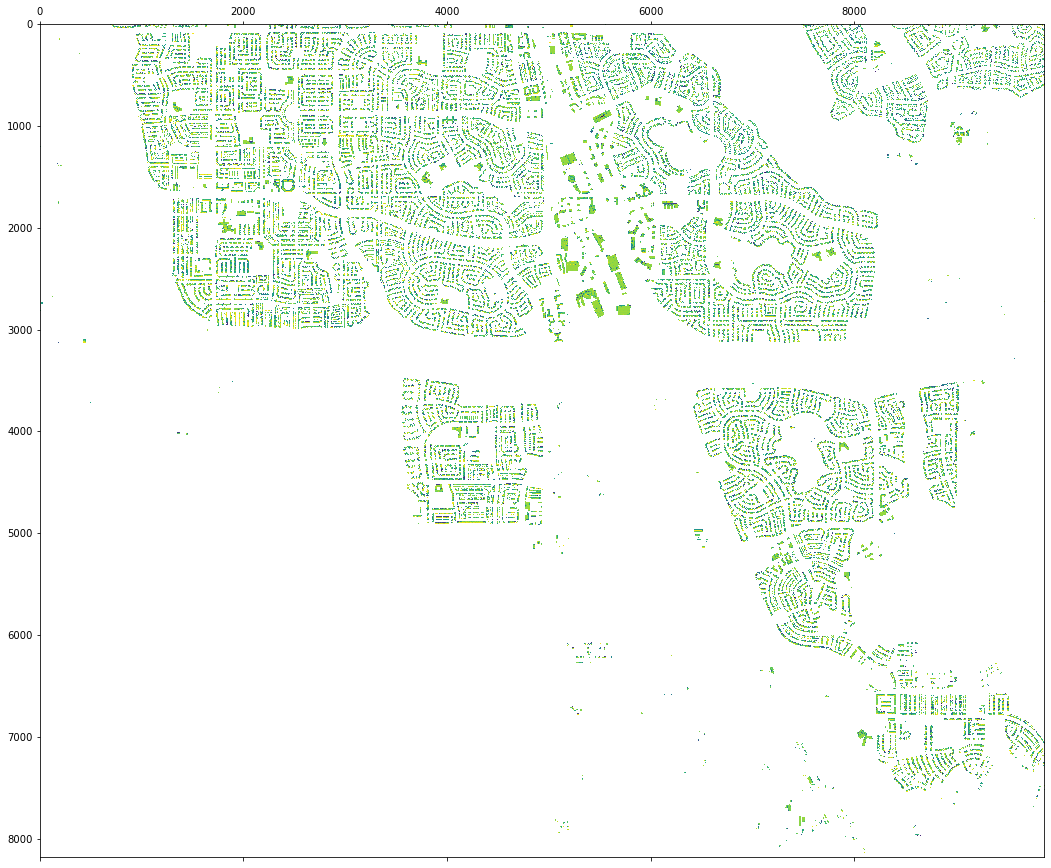

In [26]:
data.plot(figsize=(18,24))

In [9]:
data.geot

(-14761.5, 1.0, 0.0, 5642879.5, 0.0, -1.0)

In [12]:
gr.get_geo_info(raster)

(-32767.0,
 4937,
 3765,
 (-14761.5, 1.0, 0.0, 5642879.5, 0.0, -1.0),
 <osgeo.osr.SpatialReference; proxy of <Swig Object of type 'OSRSpatialReferenceShadow *' at 0x000001914F45BFC0> >,
 'Float32')

In [7]:
import pandas as pd
df = data.to_pandas()

In [23]:
geo_df = data.to_geopandas()

In [8]:
df

,row,col,value,x,y
0,166,225,0.449764,-14536.5,5642713.5
1,166,226,0.620750,-14535.5,5642713.5
2,167,220,0.392557,-14541.5,5642712.5
3,167,221,0.390555,-14540.5,5642712.5
4,167,222,1.124310,-14539.5,5642712.5
...,...,...,...,...,...
18608,3074,3088,3.021223,-11673.5,5639805.5
18609,3074,3089,3.266457,-11672.5,5639805.5
18610,3074,3090,3.254588,-11671.5,5639805.5
18611,3074,3091,3.064724,-11670.5,5639805.5


In [24]:
geo_df

,row,col,value,x,y,geometry
0,0,686,1.150484,-9256.5,5642848.5,"POLYGON ((-9256.500 5642848.500, -9255.500 564..."
1,0,687,1.834236,-9255.5,5642848.5,"POLYGON ((-9255.500 5642848.500, -9254.500 564..."
2,0,688,1.959779,-9254.5,5642848.5,"POLYGON ((-9254.500 5642848.500, -9253.500 564..."
3,0,689,2.473873,-9253.5,5642848.5,"POLYGON ((-9253.500 5642848.500, -9252.500 564..."
4,0,690,2.505961,-9252.5,5642848.5,"POLYGON ((-9252.500 5642848.500, -9251.500 564..."
...,...,...,...,...,...,...
6018971,8142,8078,2.736389,-1864.5,5634706.5,"POLYGON ((-1864.500 5634706.500, -1863.500 563..."
6018972,8142,8079,3.160151,-1863.5,5634706.5,"POLYGON ((-1863.500 5634706.500, -1862.500 563..."
6018973,8142,8080,3.103415,-1862.5,5634706.5,"POLYGON ((-1862.500 5634706.500, -1861.500 563..."
6018974,8142,8081,2.937448,-1861.5,5634706.5,"POLYGON ((-1861.500 5634706.500, -1860.500 563..."


In [ ]:
df.describe()

In [8]:
df.iloc[0]

row      0.000000e+00
col      6.860000e+02
value    1.150484e+00
x       -9.256500e+03
y        5.642848e+06
Name: 0, dtype: float64

In [9]:

with open(prj_list[0], "r") as f:
    for l in f: 
        print(l)
        data = l.split(',')
    print(data)


PROJCS["NAD_1983_3TM_114",GEOGCS["GCS_North_American_1983",DATUM["D_NORTH_AMERICAN_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Transverse_Mercator"],PARAMETER["scale_factor",0.9999],PARAMETER["central_meridian",-114],PARAMETER["latitude_of_origin",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1]]

['PROJCS["NAD_1983_3TM_114"', 'GEOGCS["GCS_North_American_1983"', 'DATUM["D_NORTH_AMERICAN_1983"', 'SPHEROID["GRS_1980"', '6378137', '298.257222101]]', 'PRIMEM["Greenwich"', '0]', 'UNIT["Degree"', '0.017453292519943295]]', 'PROJECTION["Transverse_Mercator"]', 'PARAMETER["scale_factor"', '0.9999]', 'PARAMETER["central_meridian"', '-114]', 'PARAMETER["latitude_of_origin"', '0]', 'PARAMETER["false_easting"', '0]', 'PARAMETER["false_northing"', '0]', 'UNIT["Meter"', '1]]\n']


In [10]:
print(type(data))

<class 'list'>


In [11]:
gr.get_geo_info(raster, band=1)

(-32767.0,
 9866,
 8184,
 (-9942.5, 1.0, 0.0, 5642848.5, 0.0, -1.0),
 <osgeo.osr.SpatialReference; proxy of <Swig Object of type 'OSRSpatialReferenceShadow *' at 0x0000028EE8BC6E40> >,
 'Float32')

In [ ]:
import rasterio
import numpy as np
from affine import Affine
from pyproj import Proj, transform

In [12]:
fname = raster

# Read raster
with rasterio.open(fname) as r:
    T0 = r.transform  # upper-left pixel corner affine transform
    p1 = Proj(r.crs)
    A = r.read()  # pixel values

# All rows and columns
cols, rows = np.meshgrid(np.arange(A.shape[2]), np.arange(A.shape[1]))

# Get affine transform for pixel centres
T1 = T0 * Affine.translation(0.5, 0.5)
# Function to convert pixel row/column index (from 0) to easting/northing at centre
rc2en = lambda r, c: (c, r) * T1

# All eastings and northings (there is probably a faster way to do this)
eastings, northings = np.vectorize(rc2en, otypes=[np.float, np.float])(rows, cols)

# Project all longitudes, latitudes
p2 = Proj(proj='latlong',datum='WGS84')
longs, lats = transform(p1, p2, eastings, northings)

KeyboardInterrupt: 